In [69]:
import numpy as np
from random import randint, random
import itertools
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [36]:
max_distance = 1000
n = 120 #number of outside edge pieces
k = 5 # How many of the closest neighbors to keep

In [96]:
initial_distances = [randint(0, max_distance) for _ in range(n)]

In [97]:
initial_distances[0:10], initial_distances[-10:]

([331, 525, 848, 196, 375, 923, 318, 187, 148, 106],
 [529, 73, 423, 986, 427, 414, 159, 947, 641, 20])

In [103]:
len(initial_distances)

120

In [98]:
for x, y in itertools.zip_longest(initial_distances, initial_distances[1:] + [initial_distances[0]]):
    print(x,y)

331 525
525 848
848 196
196 375
375 923
923 318
318 187
187 148
148 106
106 189
189 902
902 282
282 892
892 930
930 733
733 326
326 927
927 115
115 970
970 777
777 349
349 190
190 928
928 403
403 868
868 939
939 421
421 89
89 700
700 895
895 937
937 145
145 971
971 118
118 785
785 670
670 221
221 424
424 465
465 138
138 813
813 471
471 75
75 446
446 121
121 118
118 989
989 250
250 726
726 484
484 585
585 598
598 158
158 219
219 388
388 170
170 35
35 826
826 356
356 999
999 150
150 511
511 352
352 728
728 768
768 937
937 32
32 877
877 475
475 263
263 260
260 91
91 26
26 177
177 672
672 861
861 140
140 913
913 378
378 172
172 282
282 545
545 864
864 804
804 524
524 210
210 935
935 208
208 952
952 726
726 827
827 274
274 769
769 286
286 722
722 996
996 257
257 275
275 475
475 583
583 767
767 585
585 882
882 359
359 603
603 643
643 518
518 83
83 132
132 529
529 73
73 423
423 986
986 427
427 414
414 159
159 947
947 641
641 20
20 331


In [99]:
#Now we have what each puzzle piece will be. We'll make half of them negative (for innies)
inny_next = False
for x, y in itertools.zip_longest(initial_distances, initial_distances[1:] + [initial_distances[0]]):
    if inny_next:
        x = x * -1 # x is negative, so y has to be positive
        inny_next = False
    if bool(randint(0,1)):
        y = y * -1
    else:
        inny_next = True
    print(x,y)

331 525
-525 848
-848 -196
196 375
-375 -923
923 318
-318 187
-187 -148
148 -106
106 189
-189 902
-902 -282
282 -892
892 930
-930 -733
733 326
-326 927
-927 115
-115 970
-970 777
-777 -349
349 190
-190 928
-928 -403
403 868
-868 939
-939 421
-421 -89
89 -700
700 -895
895 -937
937 -145
145 -971
971 -118
118 -785
785 670
-670 -221
221 424
-424 -465
465 -138
138 -813
813 471
-471 -75
75 446
-446 -121
121 -118
118 989
-989 -250
250 726
-726 -484
484 -585
585 598
-598 -158
158 -219
219 -388
388 -170
170 -35
35 -826
826 -356
356 -999
999 -150
150 511
-511 352
-352 -728
728 -768
768 -937
937 32
-32 877
-877 475
-475 263
-263 -260
260 -91
91 -26
26 -177
177 672
-672 -861
861 140
-140 -913
913 378
-378 -172
172 282
-282 545
-545 -864
864 -804
804 -524
524 -210
210 -935
935 208
-208 -952
952 726
-726 827
-827 -274
274 769
-769 -286
286 722
-722 996
-996 257
-257 -275
275 -475
475 -583
583 767
-767 -585
585 -882
882 359
-359 603
-603 643
-643 518
-518 83
-83 -132
132 -529
529 73
-73 423
-423 986


In [100]:
def mutate_inny(dists):
    inny_next = False
    ret = []
    for x, y in itertools.zip_longest(dists, dists[1:] + [dists[0]]):        
        if inny_next:
            x = x * -1 # last y was positive, so x has to be negative
            inny_next = False
        if bool(randint(0,1)):
            y = y * -1
        else:
            inny_next = True
        ret.append((x,y,))
        
    #Since we set inny_next to False at the beginning, we need to make sure the last value is an outy
    if ret[-1][1] > 0:
        ret[0][1] *= -1
    return ret

In [101]:
inny_dists = mutate_inny(initial_distances)

TypeError: 'tuple' object does not support item assignment

In [14]:
inny_dists

[(761, -491),
 (491, 780),
 (-780, 932),
 (-932, -621),
 (621, -718),
 (718, 872),
 (-872, -968),
 (968, 382),
 (-382, -63),
 (63, 343),
 (-343, -933),
 (933, -306),
 (306, -553),
 (553, -61),
 (61, 71),
 (-71, 30),
 (-30, -215),
 (215, 218),
 (-218, -536),
 (536, 647),
 (-647, 324),
 (-324, -457),
 (457, 832),
 (-832, -415),
 (415, -271),
 (271, 587),
 (-587, 61),
 (-61, -952),
 (952, 226),
 (-226, 806),
 (-806, 931),
 (-931, 819),
 (-819, 502),
 (-502, 161),
 (-161, -162),
 (162, 300),
 (-300, 802),
 (-802, 240),
 (-240, 785),
 (-785, 993),
 (-993, -796),
 (796, -942),
 (942, -259),
 (259, -674),
 (674, -502),
 (502, -658),
 (658, 946),
 (-946, -178),
 (178, -190),
 (190, -522),
 (522, -200),
 (200, -187),
 (187, -333),
 (333, 737),
 (-737, 853),
 (-853, -527),
 (527, 409),
 (-409, 875),
 (-875, 478),
 (-478, 985),
 (-985, -968),
 (968, 399),
 (-399, 494),
 (-494, -856),
 (856, 995),
 (-995, -414),
 (414, 519),
 (-519, 750),
 (-750, 994),
 (-994, 432),
 (-432, -279),
 (279, 581),
 (-

In [102]:
len(inny_dists)

121

Ok, now we want to add a little bit of noise to the matchings

In [15]:
noise_amount = 5

In [16]:
noisy_dists = [(x + randint(-1 * noise_amount,noise_amount), y + randint(-1 * noise_amount, noise_amount))
               for (x,y) in inny_dists]

In [17]:
[(abs(x), abs(y)) for (x,y) in noisy_dists]

[(760, 495),
 (491, 783),
 (780, 928),
 (935, 621),
 (625, 721),
 (717, 870),
 (870, 968),
 (973, 380),
 (384, 60),
 (58, 348),
 (346, 934),
 (937, 304),
 (307, 551),
 (548, 64),
 (66, 66),
 (73, 25),
 (28, 217),
 (220, 218),
 (222, 539),
 (535, 642),
 (649, 321),
 (321, 459),
 (458, 829),
 (828, 416),
 (420, 275),
 (266, 590),
 (590, 60),
 (65, 952),
 (948, 221),
 (221, 810),
 (807, 929),
 (926, 824),
 (819, 500),
 (504, 161),
 (161, 157),
 (157, 301),
 (298, 804),
 (806, 242),
 (239, 783),
 (788, 990),
 (991, 793),
 (794, 944),
 (940, 255),
 (264, 676),
 (676, 504),
 (507, 656),
 (654, 943),
 (944, 180),
 (174, 190),
 (195, 518),
 (526, 197),
 (198, 192),
 (184, 334),
 (338, 733),
 (737, 854),
 (858, 531),
 (532, 409),
 (407, 870),
 (874, 481),
 (479, 981),
 (986, 965),
 (970, 399),
 (395, 499),
 (497, 858),
 (859, 993),
 (992, 413),
 (418, 516),
 (517, 745),
 (748, 997),
 (999, 427),
 (431, 276),
 (281, 582),
 (585, 623),
 (625, 812),
 (819, 801),
 (800, 841),
 (833, 42),
 (52, 793)

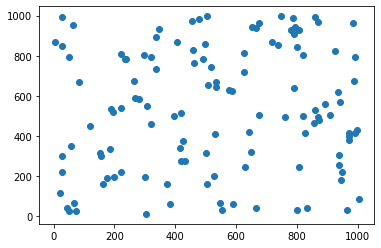

In [18]:
plt.scatter(*zip(*[(abs(x), abs(y)) for (x,y) in noisy_dists]))

In [113]:
#This doesn't really make sense to plot graphically. I think it's enough to have the noisy_dists. Let's try a dumb
#backtracking search on it and see how fast it goes

first we should create the pairwise distances, and plot those, and then also cull the top 10 closest distances

In [19]:
noisy_dists[0:10]

[(760, -495),
 (491, 783),
 (-780, 928),
 (-935, -621),
 (625, -721),
 (717, 870),
 (-870, -968),
 (973, 380),
 (-384, -60),
 (58, 348)]

In [20]:
def pos(x):
    return x > 0

In [21]:
pairs = [[]] * len(noisy_dists)
for i, (_,y) in tqdm(enumerate(noisy_dists)):
    y_pos = pos(y)
    pairs[i] = [abs(y + x) for (x,_) in noisy_dists]

121it [00:00, 27669.33it/s]


In [22]:
pairs[0]

[265,
 4,
 1275,
 1430,
 130,
 222,
 1365,
 478,
 879,
 437,
 841,
 442,
 188,
 53,
 429,
 568,
 523,
 275,
 717,
 40,
 1144,
 816,
 37,
 1323,
 75,
 229,
 1085,
 560,
 453,
 716,
 1302,
 1421,
 1314,
 999,
 656,
 338,
 793,
 1301,
 734,
 1283,
 1486,
 299,
 445,
 231,
 181,
 12,
 159,
 1439,
 321,
 300,
 31,
 297,
 311,
 157,
 1232,
 1353,
 37,
 902,
 1369,
 974,
 1481,
 475,
 890,
 992,
 364,
 1487,
 77,
 1012,
 1243,
 1494,
 926,
 214,
 1080,
 130,
 324,
 305,
 338,
 547,
 1284,
 413,
 997,
 176,
 1295,
 523,
 1484,
 1170,
 1460,
 517,
 616,
 41,
 475,
 909,
 157,
 397,
 1050,
 469,
 196,
 306,
 1028,
 170,
 1437,
 82,
 136,
 259,
 1285,
 1137,
 920,
 867,
 649,
 190,
 498,
 1366,
 999,
 1499,
 579,
 1161,
 539,
 446,
 522,
 360,
 958]

In [23]:
len(pairs)

121

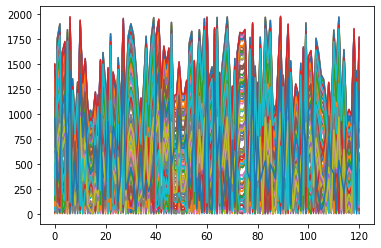

In [24]:
plt.plot(pairs)

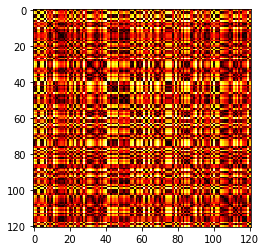

In [25]:
%matplotlib inline
plt.imshow(pairs, cmap='hot', interpolation='nearest')
plt.show()

In [26]:
[p[0:10] for p in pairs[0:10]]

[[265, 4, 1275, 1430, 130, 222, 1365, 478, 879, 437],
 [1543, 1274, 3, 152, 1408, 1500, 87, 1756, 399, 841],
 [1688, 1419, 148, 7, 1553, 1645, 58, 1901, 544, 986],
 [139, 130, 1401, 1556, 4, 96, 1491, 352, 1005, 563],
 [39, 230, 1501, 1656, 96, 4, 1591, 252, 1105, 663],
 [1630, 1361, 90, 65, 1495, 1587, 0, 1843, 486, 928],
 [208, 477, 1748, 1903, 343, 251, 1838, 5, 1352, 910],
 [1140, 871, 400, 555, 1005, 1097, 490, 1353, 4, 438],
 [700, 431, 840, 995, 565, 657, 930, 913, 444, 2],
 [1108, 839, 432, 587, 973, 1065, 522, 1321, 36, 406]]

So, that diagonal line is the perfect path. It looks obvious because the pieces are in sorted order. Now the question is, if we cull everything to the top 10 distances (or maybe just dist < 40), do we get many paths

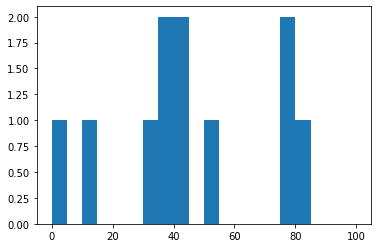

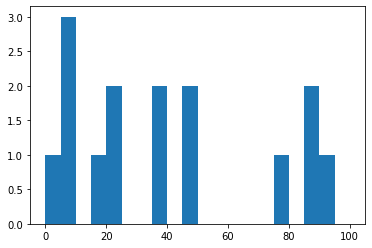

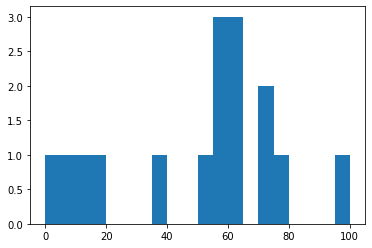

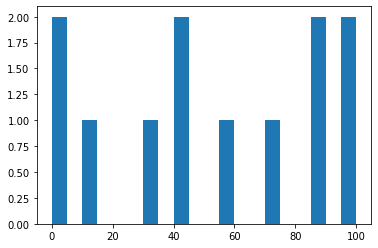

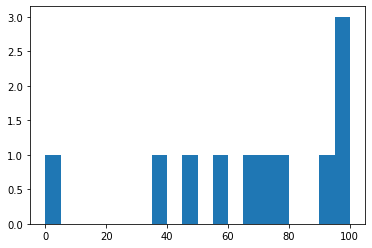

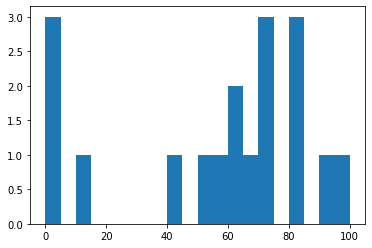

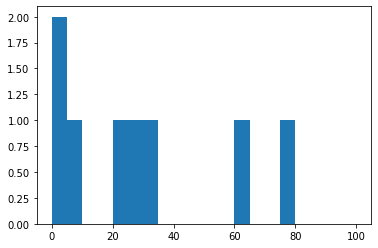

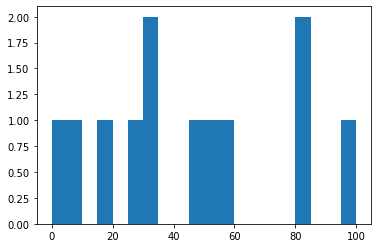

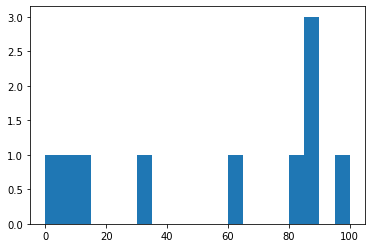

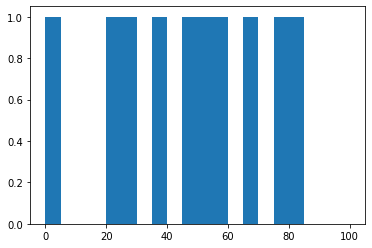

In [27]:
for i in range(10):
    plt.hist(pairs[i], bins=20, range = [0,100])
    plt.show()

In [28]:
#So we notice that most pieces seem to have several possible neigbors with dist < 100

In [29]:
[len(list(filter(lambda p: p < 100, piece))) for piece in pairs]

[11,
 15,
 15,
 12,
 11,
 18,
 8,
 12,
 10,
 10,
 10,
 11,
 12,
 10,
 14,
 15,
 14,
 7,
 12,
 8,
 10,
 10,
 16,
 9,
 15,
 13,
 13,
 10,
 6,
 15,
 15,
 15,
 15,
 9,
 10,
 9,
 15,
 7,
 15,
 11,
 9,
 10,
 17,
 9,
 11,
 8,
 15,
 10,
 11,
 10,
 11,
 11,
 12,
 15,
 17,
 11,
 15,
 18,
 15,
 11,
 8,
 12,
 15,
 12,
 11,
 9,
 13,
 14,
 11,
 15,
 15,
 13,
 12,
 10,
 9,
 11,
 13,
 15,
 12,
 15,
 11,
 15,
 15,
 11,
 8,
 14,
 15,
 12,
 10,
 8,
 15,
 11,
 13,
 13,
 12,
 12,
 11,
 11,
 9,
 15,
 12,
 11,
 17,
 15,
 8,
 15,
 11,
 9,
 11,
 14,
 18,
 15,
 11,
 13,
 8,
 14,
 11,
 15,
 12,
 16,
 10]

(array([ 1.,  2.,  0.,  8.,  0.,  9., 14.,  0., 23.,  0., 14.,  8.,  0.,
         6.,  0., 28.,  2.,  0.,  3.,  3.]),
 array([ 6. ,  6.6,  7.2,  7.8,  8.4,  9. ,  9.6, 10.2, 10.8, 11.4, 12. ,
        12.6, 13.2, 13.8, 14.4, 15. , 15.6, 16.2, 16.8, 17.4, 18. ]),
 <a list of 20 Patch objects>)

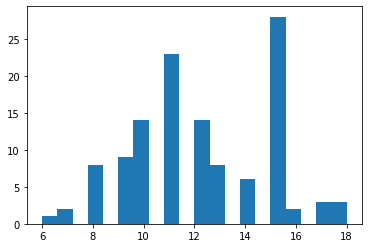

In [30]:
plt.hist([len(list(filter(lambda p: p < 100, piece))) for piece in pairs], bins=20)

In [37]:
#Let's be a little more crafty and pick the lowest 10 distances in the pairs list

In [38]:
def top10(a):
    sorted(range(len(a)), key=lambda i: a[i])[-10:]

In [39]:
def topkth(a, k=10):
    return sorted(a, reverse=True)[-k]

In [40]:
topkth(pairs[0])

77

In [41]:
close_neighbors = []
for pair in pairs:
    neighs = []
    top10th= topkth(pair, k)
    for i in range(len(pair)):
        if pair[i] <= top10th:
            neighs.append(i)
    close_neighbors.append(neighs.copy())

In [42]:
close_neighbors

[[1, 22, 45, 50, 56],
 [2, 39, 78, 82, 104],
 [3, 31, 47, 86, 100],
 [4, 46, 73, 99, 101, 102],
 [0, 5, 44, 46, 99],
 [6, 23, 55, 58, 111],
 [7, 28, 42, 61, 90],
 [8, 10, 57, 62, 91, 107],
 [9, 14, 95, 110, 117],
 [8, 10, 21, 62, 107],
 [11, 28, 42, 61, 79, 90],
 [12, 71, 81, 96, 109],
 [13, 19, 50, 56, 101],
 [9, 14, 95, 110, 117],
 [15, 27, 77, 114, 116],
 [16, 83, 87, 116, 118],
 [17, 49, 51, 97, 103],
 [18, 29, 34, 38, 108],
 [13, 19, 45, 50, 56],
 [20, 26, 85, 105, 115],
 [8, 10, 21, 36, 107],
 [1, 22, 24, 66, 89],
 [23, 30, 32, 37, 55, 82],
 [1, 22, 24, 66, 89],
 [25, 43, 71, 96, 109],
 [26, 72, 94, 98, 105],
 [15, 27, 77, 114, 116],
 [11, 28, 42, 61, 90],
 [18, 29, 34, 38, 108],
 [23, 30, 32, 37, 82],
 [3, 31, 47, 86, 100],
 [23, 30, 32, 37, 82],
 [33, 63, 67, 80, 112],
 [18, 29, 34, 88, 108],
 [35, 48, 49, 52, 97],
 [10, 21, 36, 38, 107],
 [30, 32, 37, 78, 82, 104],
 [18, 21, 29, 36, 38],
 [2, 39, 78, 82, 104],
 [40, 60, 65, 69, 84],
 [0, 41, 74, 75, 76],
 [11, 28, 42, 61, 90],

In [43]:
adj_mat = []
for piece in close_neighbors:
    adj_mat.append([1 if i in piece else 0 for i in range(n)])

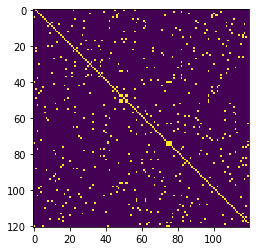

In [44]:
plt.imshow(adj_mat)

In [45]:
10 in piece

False

In [47]:
[p[0:10] for p in adj_mat[0:10]]

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

In [48]:
#and I think we have a distance matrix with pairs

In [49]:
[p[0:10] for p in pairs[0:10]]

[[265, 4, 1275, 1430, 130, 222, 1365, 478, 879, 437],
 [1543, 1274, 3, 152, 1408, 1500, 87, 1756, 399, 841],
 [1688, 1419, 148, 7, 1553, 1645, 58, 1901, 544, 986],
 [139, 130, 1401, 1556, 4, 96, 1491, 352, 1005, 563],
 [39, 230, 1501, 1656, 96, 4, 1591, 252, 1105, 663],
 [1630, 1361, 90, 65, 1495, 1587, 0, 1843, 486, 928],
 [208, 477, 1748, 1903, 343, 251, 1838, 5, 1352, 910],
 [1140, 871, 400, 555, 1005, 1097, 490, 1353, 4, 438],
 [700, 431, 840, 995, 565, 657, 930, 913, 444, 2],
 [1108, 839, 432, 587, 973, 1065, 522, 1321, 36, 406]]

In [50]:
#Numpy wil give us some nice tools
dist_mat = np.array(pairs)
adj_mat = np.array(adj_mat)

So we're going to do DFS on the problem.
So our intermediate result type is going to be a path of nodes we've picked, and its distance so far.
If we ever get to a path that adds up to the best distance so far, we should return.
If we have no more places to go, we should return.
If we get back to the starting point, we are at the best path so far 

So we should have a best_path_so_far variable, and a current_path. And then DFS 

In [51]:
a = adj_mat[0]

In [52]:
current_path = np.array([0, 4, 10,98, 1])

In [53]:
neighs = np.where(a==1)[0]

In [54]:
neighs

array([ 1, 22, 45, 50, 56])

In [55]:
dist_mat[0, neighs]

array([ 4, 37, 12, 31, 37])

In [56]:
np.isin(neighs, current_path, invert=True)

array([False,  True,  True,  True,  True])

In [57]:
neighs[np.isin(neighs, current_path, invert=True)]

array([22, 45, 50, 56])

In [58]:
to_exp = neighs[np.isin(neighs, current_path, invert=True)]

In [59]:
dist_mat[0, to_exp]

array([37, 12, 31, 37])

In [60]:
explore_order = np.argsort(dist_mat[0, to_exp])

In [61]:
explore_order

array([1, 2, 0, 3])

In [62]:
to_exp[explore_order]

array([45, 50, 22, 56])

In [63]:
dist_mat[0, to_exp[explore_order]]

array([12, 31, 37, 37])

In [64]:
dist_mat[0]

array([ 265,    4, 1275, 1430,  130,  222, 1365,  478,  879,  437,  841,
        442,  188,   53,  429,  568,  523,  275,  717,   40, 1144,  816,
         37, 1323,   75,  229, 1085,  560,  453,  716, 1302, 1421, 1314,
        999,  656,  338,  793, 1301,  734, 1283, 1486,  299,  445,  231,
        181,   12,  159, 1439,  321,  300,   31,  297,  311,  157, 1232,
       1353,   37,  902, 1369,  974, 1481,  475,  890,  992,  364, 1487,
         77, 1012, 1243, 1494,  926,  214, 1080,  130,  324,  305,  338,
        547, 1284,  413,  997,  176, 1295,  523, 1484, 1170, 1460,  517,
        616,   41,  475,  909,  157,  397, 1050,  469,  196,  306, 1028,
        170, 1437,   82,  136,  259, 1285, 1137,  920,  867,  649,  190,
        498, 1366,  999, 1499,  579, 1161,  539,  446,  522,  360,  958])

In [70]:
best_cost = 10000000000000000
best_depth = 0
iter_count=0
def search(current_path):
    global best_cost, best_depth, iter_count
    iter_count +=1
    current_travelled, path = current_path
    depth = len(path)
    if depth > n:
        print(f"Err, given path with length {len(path)}. Returning: {path}")
        return
    if depth > best_depth:
        print(f"At best depth {depth} with cost {current_travelled}, path is {path}")
        best_depth = depth
    current_node = path[-1]
    if current_node == 0:
        if len(path) > n:
            #We're done
            if current_travelled < best_cost:
                print(f"Found loop with new best cost {current_travelled}: \n{path}")
                best_cost = current_travelled
            return
        else: #We arrived at 0 too early
            return
    
    neighbors = np.where(adj_mat[current_node] == 1)[0]
    to_explore = neighbors[np.isin(neighbors, path, invert=True)]


    if len(to_explore) == 0:
        return
    explore_order = np.argsort(dist_mat[current_node, to_explore])
#     if depth < 60:
#         to_iter = tqdm(to_explore[explore_order])
#     else:
    to_iter = to_explore[explore_order]
    if best_depth == depth:
        print(f"to explore is {to_explore} {to_iter}")
    if random() > 0.9999:
        print(iter_count, depth, current_travelled, to_iter, path)
    for node in to_iter:
        search((current_travelled + dist_mat[current_node, node], path + [node]))

In [71]:
search((0,[1,],))

At best depth 1 with cost 0, path is [1]
to explore is [  2  39  78  82 104] [  2  39  78 104  82]
At best depth 2 with cost 3, path is [1, 2]
to explore is [  3  31  47  86 100] [ 31   3 100  47  86]
At best depth 3 with cost 5, path is [1, 2, 31]
to explore is [23 30 32 37 82] [23 32 30 37 82]
At best depth 4 with cost 9, path is [1, 2, 31, 23]
to explore is [22 24 66 89] [66 24 89 22]
At best depth 5 with cost 11, path is [1, 2, 31, 23, 66]
to explore is [ 33  67  80  98 112] [ 67  33 112  80  98]
At best depth 6 with cost 12, path is [1, 2, 31, 23, 66, 67]
to explore is [39 54 68 78] [68 54 39 78]
At best depth 7 with cost 15, path is [1, 2, 31, 23, 66, 67, 68]
to explore is [ 40  65  69  84 113] [ 69  65  40 113  84]
At best depth 8 with cost 17, path is [1, 2, 31, 23, 66, 67, 68, 69]
to explore is [ 57  62  70  91 106] [106  70  91  57  62]
At best depth 9 with cost 19, path is [1, 2, 31, 23, 66, 67, 68, 69, 106]
to explore is [  8  10  57  62 107] [107   8  62  10  57]
At best d

1358 114 471 [105  85] [1, 2, 31, 23, 66, 67, 68, 69, 106, 107, 34, 35, 36, 37, 38, 39, 40, 41, 28, 29, 30, 3, 4, 5, 6, 61, 62, 63, 64, 65, 24, 71, 72, 73, 74, 75, 76, 116, 117, 87, 88, 89, 7, 8, 9, 10, 11, 109, 110, 111, 80, 12, 13, 14, 27, 42, 43, 44, 45, 46, 47, 52, 53, 54, 55, 56, 57, 58, 59, 60, 90, 91, 92, 93, 94, 95, 96, 49, 50, 51, 97, 98, 99, 100, 101, 102, 103, 78, 79, 33, 108, 81, 82, 16, 17, 18, 19, 115, 83, 84, 20, 21, 22, 32, 112, 113, 15, 118, 119, 70, 25, 26, 77, 104]
19603 106 467 [86] [1, 2, 31, 23, 66, 67, 68, 69, 106, 107, 34, 35, 36, 37, 38, 39, 40, 41, 28, 29, 30, 3, 4, 5, 6, 61, 62, 63, 64, 65, 24, 71, 72, 73, 74, 75, 76, 116, 117, 87, 88, 89, 7, 8, 9, 10, 11, 109, 110, 111, 80, 12, 13, 14, 27, 42, 43, 44, 45, 46, 47, 52, 53, 54, 55, 56, 57, 58, 59, 60, 90, 91, 92, 93, 94, 95, 96, 49, 50, 51, 97, 98, 99, 100, 101, 102, 103, 78, 79, 33, 108, 81, 104, 26, 114, 20, 21, 22, 32, 112, 113, 77, 82, 83, 84, 85]
23970 112 587 [25] [1, 2, 31, 23, 66, 67, 68, 69, 106, 107, 

KeyboardInterrupt: 

So this DFS version doesn't work

We'd need to do held karp (dynamic programming) or something else (branch and bound)

First we could try memoizing the solution.
Where we store the answers for a subset

In [358]:
set(range(n)).difference(set(tx))

{0, 116}

In [72]:
adj_mat

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [73]:
dist_mat

array([[ 265,    4, 1275, ...,  522,  360,  958],
       [1543, 1274,    3, ...,  756, 1638,  320],
       [1688, 1419,  148, ...,  901, 1783,  465],
       ...,
       [  89,  358, 1629, ...,  876,    6, 1312],
       [1222,  953,  318, ...,  435, 1317,    1],
       [   4,  273, 1544, ...,  791,   91, 1227]])

In [74]:
adj_mat * 1000

array([[   0, 1000,    0, ...,    0,    0,    0],
       [   0,    0, 1000, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0, 1000],
       [   0,    0,    0, ...,    0,    0,    0],
       [1000,    0,    0, ...,    0,    0,    0]])

In [75]:
adj_mat * 10000000000 + dist_mat

ValueError: operands could not be broadcast together with shapes (121,120) (121,121) 

In [82]:
adj_mat.shape, dist_mat.shape

((121, 120), (121, 121))

In [84]:
#ok, so adj_mat has 1 more column than dist mat??? I thought adj_mat was dist_mat where the numbers where small enough

We only have 120 pieces... But I think it means 120 possible linkages?

In [89]:
np.array(noisy_dists).shape

(121, 2)